# **Section I : Accessing the Data**
Make a pandas DataFrame from the CSV

How many variables does the dataset contain?

What is the data about?

What are we trying to predict here?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import operator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
sns.set(style='white', color_codes=True)

In [ ]:
df=pd.read_csv("/content/ortho_knnnb.csv")

In [ ]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [ ]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [ ]:
miss_val = df.isna().sum()
miss_val

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [ ]:
df.shape

(310, 7)

In [ ]:
print("Column Names:",df.columns.values)

Column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']



# **Section II : Exploratory Data Analysis**
Perform some descriptive statistics and make a note of your findings

Plot appropriate graphs to understand the relation between the variables.

Point out any observations and comment on the strength of the relationships if any.

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


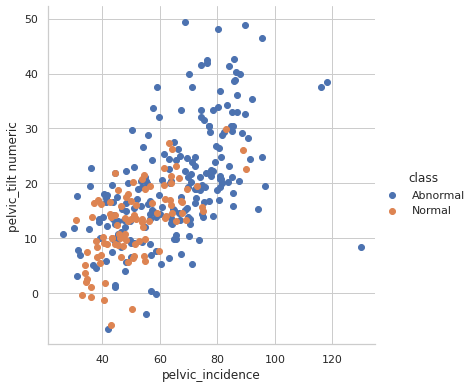

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="class", size=5.5) \
   .map(plt.scatter, "pelvic_incidence", "pelvic_tilt numeric")\
   .add_legend();
plt.show();

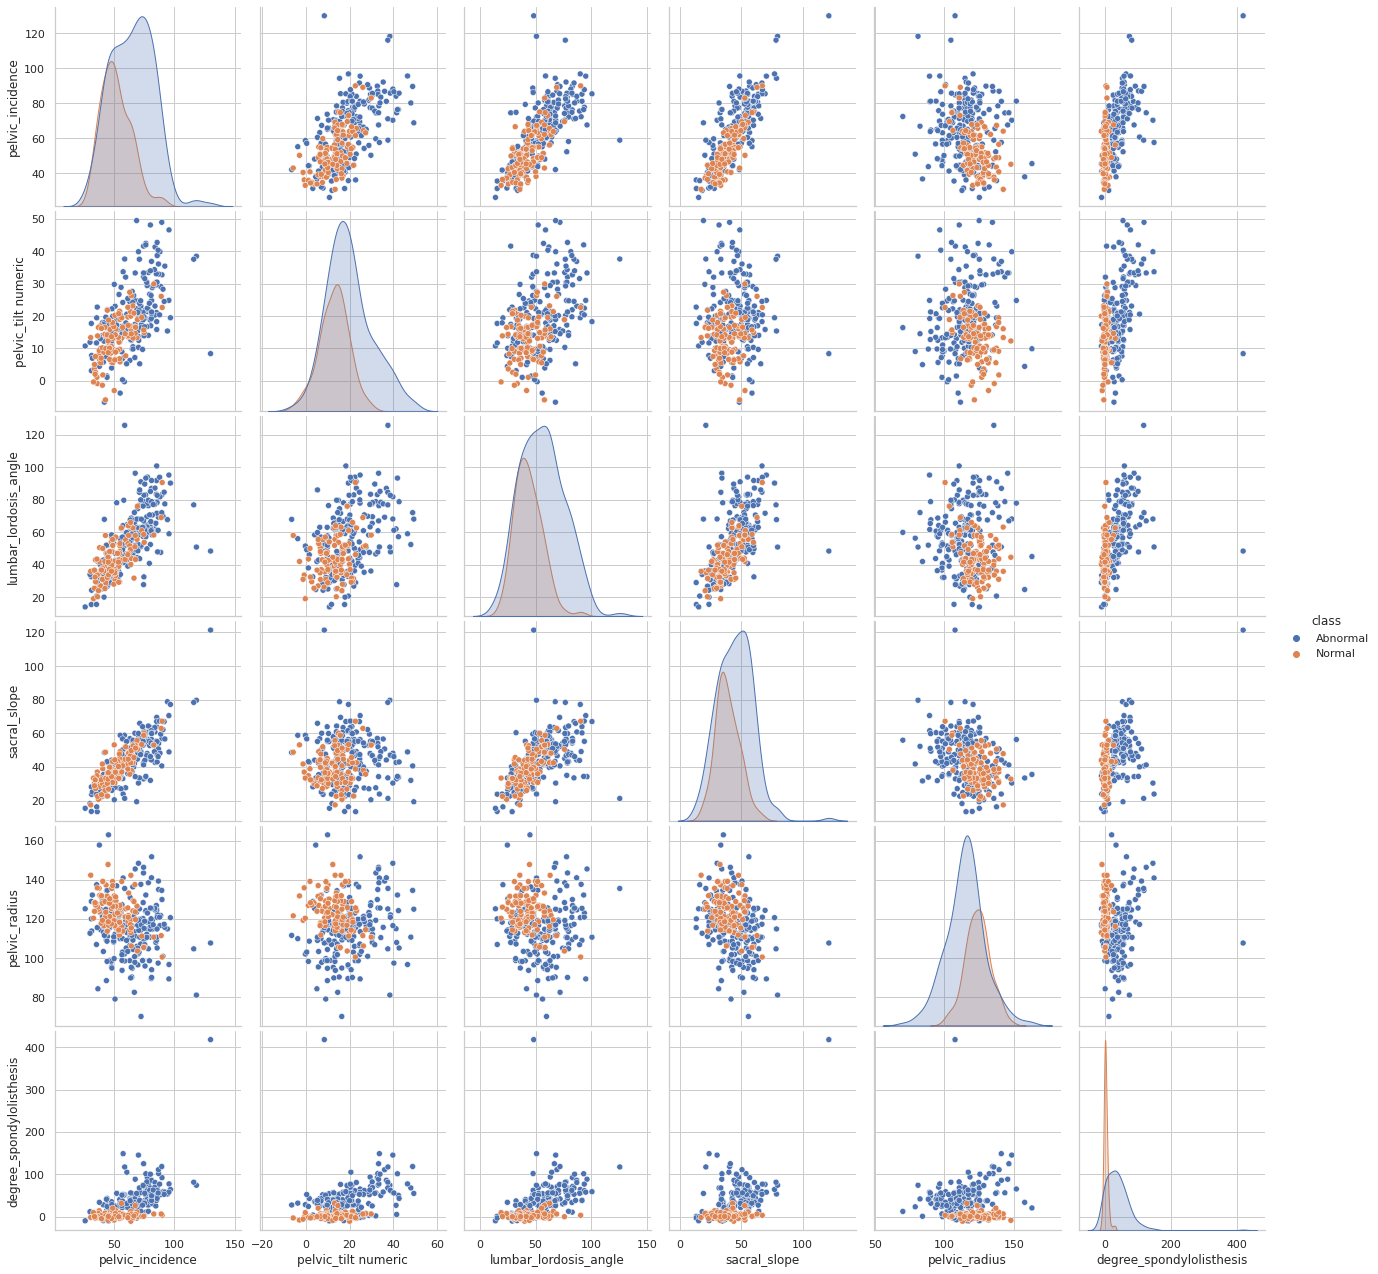

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="class", size=3);
plt.show()

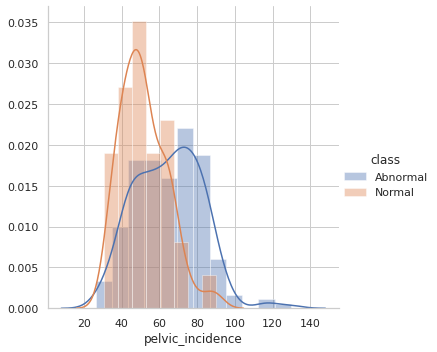

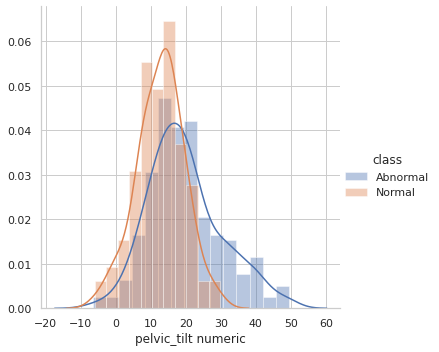

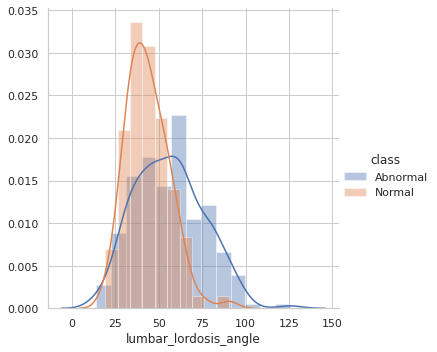

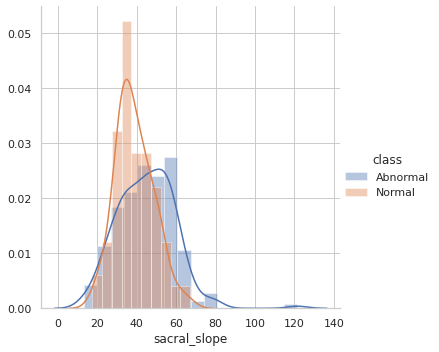

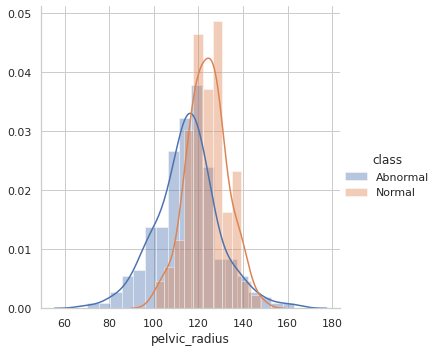

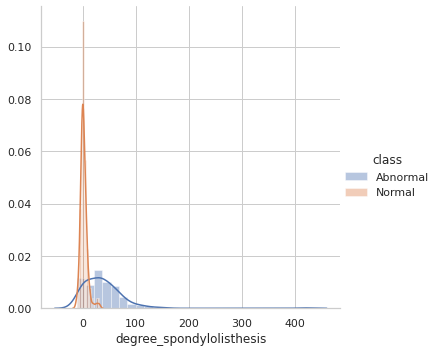

In [ ]:
for name in df.columns.values[:-1]:
    sns.FacetGrid(df, hue="class", size=5).map(sns.distplot, name).add_legend()
plt.show()

In [ ]:
print("Column Names:",df.columns.values)

Column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


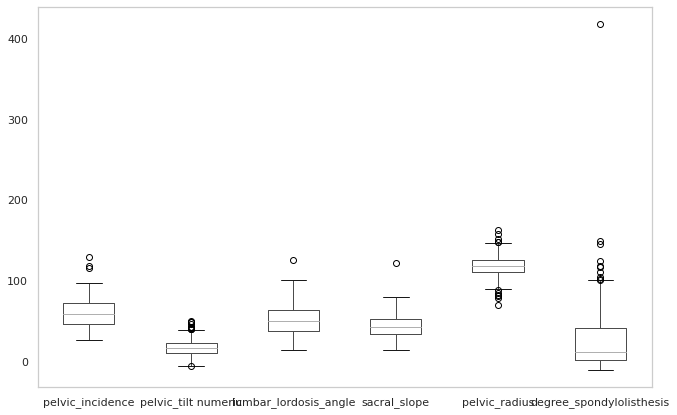

In [ ]:
df.boxplot(column= ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis'],figsize=(11,7),grid = False)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['class1']=le.fit_transform(df['class'])

In [ ]:
data_ct = df.select_dtypes(include='object')
data_ct.head()

,class
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal


In [ ]:
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

Text(0.5, 1.0, 'class distribution')

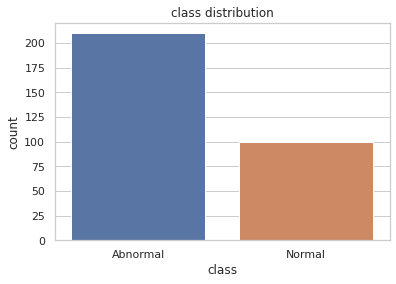

In [ ]:
sns.countplot('class',data = df)
plt.title("class distribution")

In [ ]:
data_num = df.select_dtypes(include=['float64','int64'])
data_num.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class1
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [ ]:
corr = df.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class1
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,-0.353336
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,-0.443687
class1,-0.353336,-0.326063,-0.312484,-0.210602,0.309857,-0.443687,1.000000


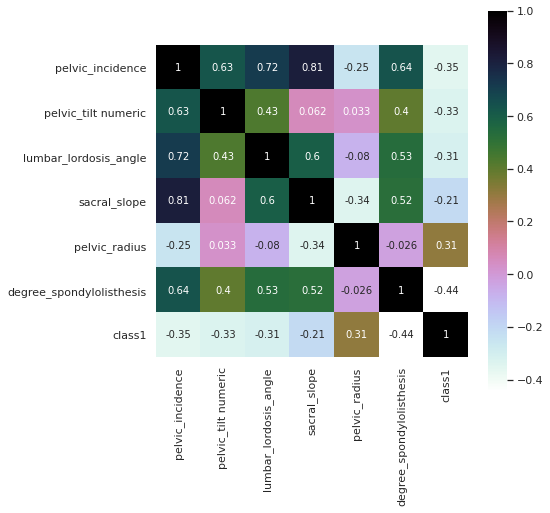

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()


# **Section IV : Training with KNN**
Use train_test_split from sklearn and split the parameters and classes into train and test sets

Starting with three nearest neighbours , train your KNN model and make a note of accuracy and other diagnostics for both training and test sets.

Try with increasing the k value and check if there is any improvement in model performance. Use different value to arrive at the optimal value of k.

Evaluate your final model using appropriate metrics for classification and comment on them.

In [ ]:
df.drop(['class'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20,random_state = 1)

In [ ]:
train_x = train.drop(['class1'], axis = 1)
train_y = train['class1']             

test_x = test.drop(['class1'],axis = 1)
test_y = test['class1']

In [ ]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (248, 6)
Dimension of train_y : (248,)
Dimension of test_x : (62, 6)
Dimension of test_y : (62,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
pred = KNN.predict(test_x)
pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

In [ ]:
train_accuracy = []
test_accuracy = []

for k in range(1,16):                                 # K from 1 to 15
    KNN = KNeighborsClassifier(n_neighbors=k)         #KNN Classifier with K = k
    KNN.fit(train_x, train_y)
#######################################################################################
    train_pred = KNN.predict(train_x)                 #prediction on trian data
    train_score = accuracy_score(train_pred,train_y)  #Train accuracy
    train_accuracy.append(train_score)
    
#######################################################################################
    test_pred = KNN.predict(test_x)                   #prediction on test data
    test_score = accuracy_score(test_pred,test_y)     #test accuracy
    test_accuracy.append(test_score)  
    
#######################################################################################

print("Best accuracy is {} with K = {}".format(max(test_accuracy),1+test_accuracy.index(max(test_accuracy))))

Best accuracy is 0.8548387096774194 with K = 1


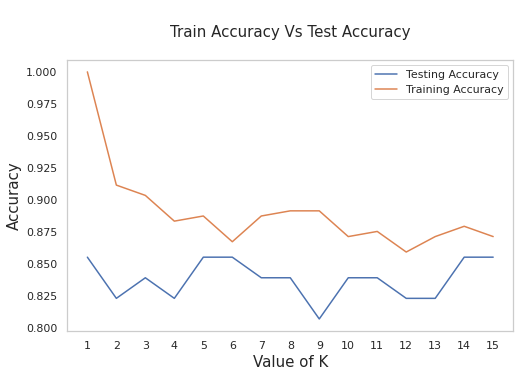

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(range(1,16), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(1,16), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('\nTrain Accuracy Vs Test Accuracy\n',fontsize=15)
plt.xlabel('Value of K',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.xticks(range(1,16))
plt.grid()
plt.show()

In [ ]:
# Tuning Parameters using Grid search cross validation 
from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors": list(range(1,16,1)), 'metric': ['euclidean','manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
grid_knn.fit(train_x, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#KNN best estimator
knn_besthypr = grid_knn.best_estimator_
knn_besthypr

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
#Print hyperparameter
print("Tuned hyperparameter: {}".format(grid_knn.best_params_)) 
print("Best score: {}".format(grid_knn.best_score_))

Tuned hyperparameter: {'metric': 'euclidean', 'n_neighbors': 15}
Best score: 0.8586938775510203


In [ ]:
#Using best hyperparameter

knn = knn_besthypr.fit(train_x,train_y)
y_pred = knn.predict(test_x)
acc = accuracy_score(y_pred,test_y)
print('The accuracy of the KNN with K = {} is {}%'.format(knn_besthypr.n_neighbors,round(acc*100,2)))

The accuracy of the KNN with K = 15 is 85.48%


In [ ]:
test = test.reset_index(drop = True)
test["pred_class"] = y_pred
test


# **Section V : Training with Naive Bayes**
Now , fit a Naive Bayes Classifier to the same data.

Train a NB model with default arguments and make a note of training and test metrics

What are your inferences on the relative performance between the KNN and NB based models?

Which of these models would you recommend and with what reasons ?

In [ ]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Predicting the Test set results
y_pred = nvclassifier.predict(test_x)
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0]


In [ ]:
#lets see the actual and predicted value 
test = test.reset_index(drop = True)
test["pred_Guassian"] = y_pred
test.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class1,pred_class,pred_Guassian
0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,0,0,0
1,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,1,0,0
2,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,0,0,0
3,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,0,0,0
4,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,0,0,0


In [ ]:
test.drop(['pred_bays'],axis=1,inplace=True)
test.drop(['pred_species'],axis=1,inplace=True)

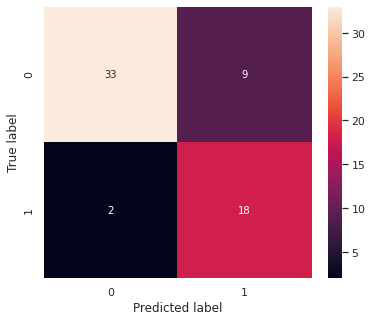

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred += cm[row,c]
        else:
            falsePred += cm[row,c]
print("*"*70)
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print("*"*70)
acc = corrPred/cm.sum()
print ('Accuracy of the Naive Bayes Clasification is {}% '.format(round(acc*100,2)))
print("*"*70)

**********************************************************************
Correct predictions:  51
False predictions 11
**********************************************************************
Accuracy of the Naive Bayes Clasification is 82.26% 
**********************************************************************


In [ ]:
#finding accuracy from Sklearn.metrics
from sklearn.metrics import accuracy_score

print('The accuracy of the NB is {}%'.format(round(accuracy_score(y_pred,test_y)*100,2)))

The accuracy of the NB is 82.26%


In [ ]:
#predicted_probabilities
nvclassifier.predict_proba(test_x)[:10]

array([[9.99976946e-01, 2.30544189e-05],
       [5.43618382e-01, 4.56381618e-01],
       [1.00000000e+00, 5.88570384e-17],
       [9.99920953e-01, 7.90472863e-05],
       [9.99996058e-01, 3.94244355e-06],
       [9.99720050e-01, 2.79949544e-04],
       [7.41812234e-03, 9.92581878e-01],
       [1.00000000e+00, 6.69383180e-17],
       [1.00000000e+00, 1.21419008e-26],
       [9.74310233e-01, 2.56897665e-02]])

# **conclusion**
as you can see the accuracy with both algorithems the KNN will be more fit as compared to the NB.

The accuracy of the KNN with K = 15 is 85.48%

The accuracy of the NB is 82.26%